-----------------------------------------------------------------------------------------------------

**Boston University**

**MET CS677 A2 Data Science with Python (Fall 2019)**

*Marty Corbett*


Homework #1

-----------------------------------------------------------------------------------------------------


Initialize the Dow Jones Industrials dataset as shown below: 

values = np.loadtxt('http://people.bu.edu/kalathur/datasets/DJI_2018_values.txt')
dates = np.loadtxt('http://people.bu.edu/kalathur/datasets/DJI_2018_dates.txt', dtype='str') 
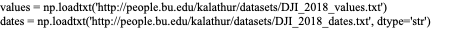


In [290]:
import numpy as np

values = np.loadtxt('http://people.bu.edu/kalathur/datasets/DJI_2018_values.txt')
dates = np.loadtxt('http://people.bu.edu/kalathur/datasets/DJI_2018_dates.txt', dtype='str') 


1) Show the appropriate formatted output for the first five dates and their corresponding values. 

In [291]:
from datetime import date


def convertToDate(date_string):
    month, day, year = date_string.split('/')
    d = date(2000 + np.uint16(year), np.uint8(month), np.uint8(day))
    return d

dates = [convertToDate(x) for x in dates]

for date, value in zip(dates[0:5], values[0:5]):
    print("{:20s} {:.2f}".format(date.strftime("%B %d, %Y"), value))

January 02, 2018     24824.00
January 03, 2018     24922.00
January 04, 2018     25075.00
January 05, 2018     25295.00
January 08, 2018     25283.00


2) Print the lowest value and the day it occurred in the dataset. Similarly, print the highest value and the day it occurred in the dataset. Use the numpy min, argmin, max, and argmax functions. 


In [292]:
min_index = np.argmin(values)
max_index = np.argmax(values)
print("lowest:    date={:20s} value={}".format(dates[min_index].strftime("%B %d, %Y"), values[min_index]))
print("highest:   date={:20s} value={}".format(dates[max_index].strftime("%B %d, %Y"), values[max_index]))

lowest:    date=December 24, 2018    value=21792.0
highest:   date=October 03, 2018     value=26828.0


3) Using day to day differences, show the results for the maximum one-day gain. Output should show the result along with the corresponding dates and values. Similarly, show the results for the maximum one-day loss. 

In [293]:
d = np.diff(values)
min_index = np.argmin(d)
max_index = np.argmax(d)

print("max_gain:    date={:20s} gain={} pre={} post={}".format(
    dates[max_index].strftime("%B %d, %Y"), d[max_index], values[max_index], values[max_index+1]))

print("max_loss:    date={:20s} loss={} pre={} post={}".format(
    dates[min_index].strftime("%B %d, %Y"), d[min_index], values[min_index], values[min_index+1]))

max_gain:    date=December 24, 2018    gain=1086.0 pre=21792.0 post=22878.0
max_loss:    date=February 02, 2018    loss=-1175.0 pre=25520.0 post=24345.0


4) Show the results here there is at least 500-point gain from the previous day. Output should include the gain, the dates and values of the corresponding day and prior day. 

In [294]:
a = values[0:-1]
b = values[1:]
deltas = np.where(b-a >= 500)[0]  # deltas => indices where tha gain is greater than or equal to 500

for d in deltas:
    gain = b[d] - a[d]
    print("{:20s} gain={}  corresponding_value={} prior_value={}".format(
        dates[d].strftime("%B %d, %Y"), gain, b[d], a[d]))


February 05, 2018    gain=567.0  corresponding_value=24912.0 prior_value=24345.0
March 23, 2018       gain=669.0  corresponding_value=24202.0 prior_value=23533.0
October 15, 2018     gain=548.0  corresponding_value=25798.0 prior_value=25250.0
November 06, 2018    gain=545.0  corresponding_value=26180.0 prior_value=25635.0
November 27, 2018    gain=618.0  corresponding_value=25366.0 prior_value=24748.0
December 24, 2018    gain=1086.0  corresponding_value=22878.0 prior_value=21792.0


5) Use the last four digits of your BU id as the random seed. Pick a random day and examine the 10 consecutive values including that day. Include the condition so that the selection will be the last 10 values if the random day pick is within that period. Show the resulting dates and the values for this period. Show daily next loss/gain for this period. What is the net gain/loss for the period? 

In [295]:
np.random.seed(7286)
random_day = np.random.randint(len(values) - 9)
period_dates  = dates[random_day : random_day + 10]
period_values = values[random_day : random_day + 10]

print()
print("Note: a negative value for gain indicates a loss")
print()

for index, (date, value) in enumerate(zip(period_dates, period_values)):
    if index == 0:
        print("{:20s} value={}".format(date.strftime("%B %d, %Y"), value))
    else:
        print("{:20s} value={} gain={}".format(date.strftime("%B %d, %Y"), value, value - period_values[index-1]))

print()
print("Period gain={}".format(v[9] - v[0]))


Note: a negative value for gain indicates a loss

September 10, 2018   value=25857.0
September 11, 2018   value=25971.0 gain=114.0
September 12, 2018   value=25998.0 gain=27.0
September 13, 2018   value=26145.0 gain=147.0
September 14, 2018   value=26154.0 gain=9.0
September 17, 2018   value=26062.0 gain=-92.0
September 18, 2018   value=26246.0 gain=184.0
September 19, 2018   value=26405.0 gain=159.0
September 20, 2018   value=26656.0 gain=251.0
September 21, 2018   value=26743.0 gain=87.0

Period gain=9


6) Use the last four digits of your BU id as the random seed. Randomly pick 10 dates in the dataset. Show by ascending order of the dates the selected dates and the corresponding values. 
Suppose you bought a different stock tied to the DOW on each of these 10 randomly selected 
dates. Suppose you decided to sell each of that stock later in the year so that you either maximize 
the gain or minimize the loss. Show for each stock, what date you would have sold? What would 
have been the gain/loss for each stock? Show the results for each these 10 dates. 


In [296]:
np.random.seed(7286)
dates_selected = np.random.randint(0, len(values), 10)

selected_date_value_pairs = [(dates[x], values[x]) for x in dates_selected]
selected_date_value_pairs = np.sort(date_value_pair, axis=0)

print()
print("Note: a negative value for gain indicates a loss")
print()

for index, (date, value) in zip(dates_selected, selected_date_value_pairs):
    if index == len(values) - 1:
        print("buy on {:20s} at {}  last trade, no further transaction information is available".format(
            date.strftime("%B %d, %Y"), value))
    else:
        max_value_index = np.argmax(values[index+1:])

        print("buy on {:20s} at {}       sell on {:20s} at {} gain={}".format(
            date.strftime("%B %d, %Y"), value,
            dates[max_value_index].strftime("%B %d, %Y"), values[max_value_index],
            values[max_value_index] - value))


Note: a negative value for gain indicates a loss

buy on January 11, 2018     at 23924.0       sell on January 25, 2018     at 26392.0 gain=2468.0
buy on April 10, 2018       at 24408.0       sell on September 21, 2018   at 26743.0 gain=2335.0
buy on May 02, 2018         at 25080.0       sell on January 08, 2018     at 25283.0 gain=203.0
buy on July 26, 2018        at 25299.0       sell on March 12, 2018       at 25178.0 gain=-121.0
buy on August 14, 2018      at 25380.0       sell on February 21, 2018    at 24797.0 gain=-583.0
buy on August 29, 2018      at 25527.0       sell on February 05, 2018    at 24345.0 gain=-1182.0
buy on September 10, 2018   at 25574.0       sell on June 05, 2018        at 24799.0 gain=-775.0
buy on September 17, 2018   at 25857.0       sell on January 18, 2018     at 26017.0 gain=160.0
buy on November 01, 2018    at 26062.0       sell on June 27, 2018        at 24117.0 gain=-1945.0
buy on November 14, 2018    at 26124.0       sell on January 18, 2018     at

7) Compute the 20-day simple moving average of the data. Plot the original data and the smoothed data. 


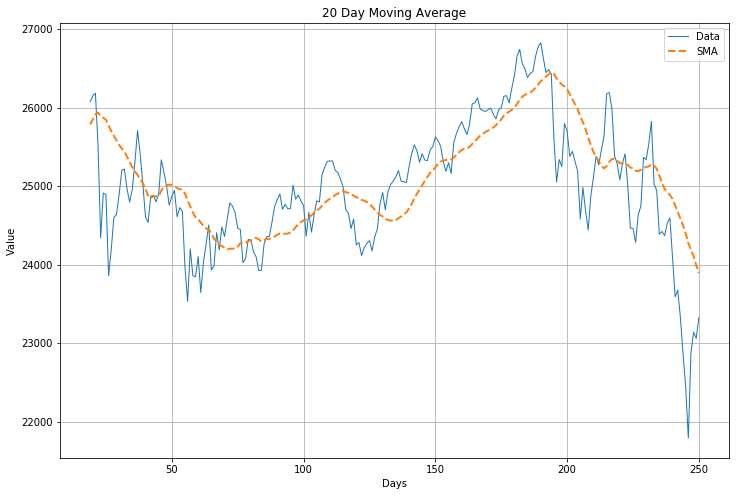

In [297]:
import matplotlib.pyplot as plt

def simpleMovingAverage(N):
    weights = np.ones(N)/N
    return np.convolve(values, weights)[N-1:-(N-1)]

N = 20
sma = simpleMovingAverage(N)

t = np.arange(N - 1, len(values))

fig, ax = plt.subplots(1, figsize=(12,8))
plt.plot(t, values[N-1:], lw=1.0, label="Data")
plt.plot(t, sma, '--', lw=2.0, label="SMA")

plt.title("{} Day Moving Average".format(N))
plt.xlabel("Days")
plt.ylabel("Value")
plt.grid()
plt.legend()
plt.show()

8) Compute the 20-day weighted moving average using the powers of 2 as the weights (1, 2, 4, 8, 16, etc.) with the recent data having the higher weights. Plot the weighted moving average along with Q7) 

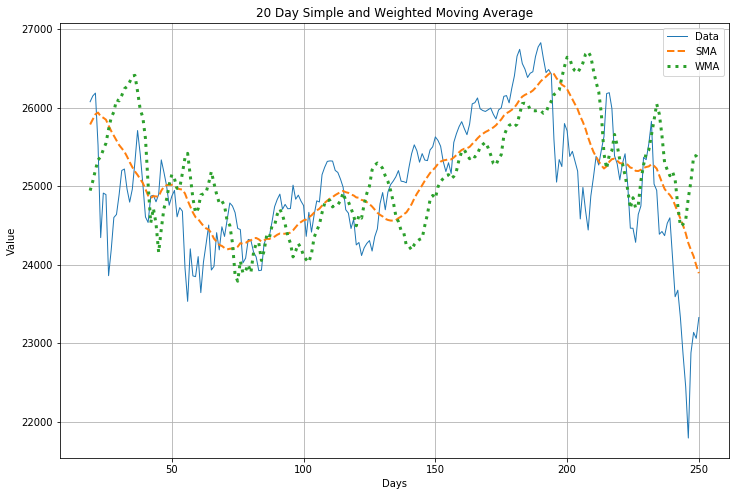

In [298]:
weights = [2**x for x in range(N-1, -1, -1)] # older dates get lower weights
wma = (np.convolve(values, weights[::-1])[N-1:-(N-1)])/sum(weights)

fig, ax = plt.subplots(1, figsize=(12,8))
plt.plot(t, values[N-1:], lw=1.0, label="Data")
plt.plot(t, sma, '--', lw=2.0, label="SMA")
plt.plot(t, wma, ':', lw=3.0, label="WMA")

plt.title("{} Day Simple and Weighted Moving Average".format(N))
plt.xlabel("Days")
plt.ylabel("Value")
plt.grid()
plt.legend()
plt.show()
plt.show()

9) Compute the number of days in which the weighted moving average is higher than the simple moving average. Show the results. 

In [299]:
print("NUmber of days the weightd moving average is higher than the simple moving average is:", np.sum(wma - sma > 0))

NUmber of days the weightd moving average is higher than the simple moving average is: 104
